In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. 

Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [3]:
# Step 1
# Decide the hypothesis





*   H0: lab1 = lab2 = lab3 = lab4
*   H1: Atleast One of them is Different


*   we got a data for 4 different laboratories and we are analyzing the outcomes based on only one factor i.e. Average Turn Around Time (TAT), hence oneway ANOVA test will be applicable for this problem statement.








In [4]:
# Collecting Evidence

lab = pd.read_csv('/content/LabTAT.csv')
lab.head(10)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
5,179.45,197.00,181.51,161.12
6,191.37,166.36,214.21,154.02
7,166.81,169.60,183.43,163.25
8,158.81,175.36,191.60,152.79
9,165.88,198.68,208.43,161.98


In [5]:
# applying descriptive stats

lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [6]:
#Checking for null values

lab.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [7]:
# Checking for duplicates

lab[lab.duplicated()].shape

(0, 4)

In [8]:
lab[lab.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [9]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


Text(0.5, 1.0, 'lab 4')

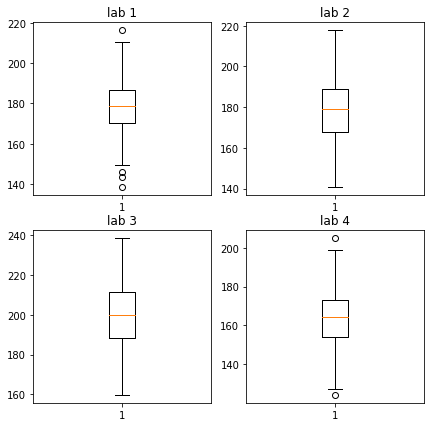

In [10]:
# Plotting the data

plt.subplots(2,2,figsize = (7,7))
plt.subplot(221)
plt.boxplot(lab['Laboratory 1'])
plt.title('lab 1')
plt.subplot(222)
plt.boxplot(lab['Laboratory 2'])
plt.title('lab 2')
plt.subplot(223)
plt.boxplot(lab['Laboratory 3'])
plt.title('lab 3')
plt.subplot(224)
plt.boxplot(lab['Laboratory 4'])
plt.title('lab 4')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='Laboratory 4', ylabel='Density'>

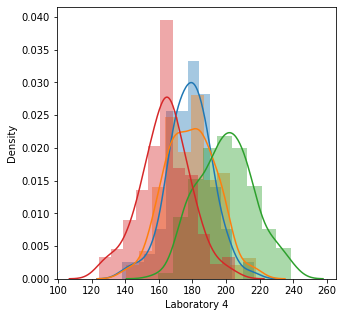

In [11]:
plt.figure(figsize= (5,5))
sns.distplot(lab['Laboratory 1'], kde=True)
sns.distplot(lab['Laboratory 2'], kde=True)
sns.distplot(lab['Laboratory 3'], kde=True)
sns.distplot(lab['Laboratory 4'], kde=True)

In [13]:
t_statistic,p_value = stats.f_oneway(lab.iloc[:,0], lab.iloc[:,1], lab.iloc[:,2], lab.iloc[:,3])
t_statistic,p_value

(118.70421654401437, 2.1156708949992414e-57)

In [14]:
p_value = 2.1156708949992414e-57
alpha = 0.5


if p_value < alpha:
  print('We reject null hypothesis, there is diffence in TAT in atleast one of the laboratory')
else:
  print('We fail to reject null hypothesis and so there is no difference TAT of any laboratory')


We reject null hypothesis, there is diffence in TAT in atleast one of the laboratory




---

